In [1]:
import numpy as np
import pandas as pd

In [8]:
writting = []
with open('writtingDictionaryDay2.txt', 'r') as f:
    for line in f.readlines():
        writting.append(line)

In [9]:
len(writting)

11932

In [10]:
writting[0]

"{'abs': ['好好学习然后上大学找工作真的是唯一的出路吗？我的回答是：不是，但这是唯一一条可以靠努力实现且没有一点不公平的出路。而爱好，真的不可以与考学成绩兼得吗？仍旧不是', '除了考学，我们还可以有很多出路，比如去创业，去打工等等，但这其中定有比考学还难的更多阻碍，更多挫折等着你去遇见。就好比你站在指教三角形中的一点，你眼前有两条道路可以达到终点，而你却非要选择那条长的路一样。不是说不考学就无法成功，这世上，有成千上万人不是考学而成功的，但考学是唯一公平的捷径。', '再说说爱好，每个人都有自己的爱好，弹琴画画写作体育等等，但在学习自己爱好的之前，文化课也是不能少的。比如你会弹吉他，而别人在请教你吉他的发声原理时，你哑口无声。爱好和文化课可兼得，但必须要分清其中的主次关系才行，学好文化课，然后再去经营自己的爱好，在自己的爱好中得到了乐趣，从而使心情愉悦对未来充满憧憬和希望，对文化课中的难题也心态端正。这样一来，爱好与考学之间的关系，不再是不可兼得，而是互赢互利了。', '而且，现在的成绩不好不代表什么，只要掌握好考学与爱好的关键点就不会错，乾坤未定，你我皆黑马。'], 'title': '关于考学和爱好', 'pmid': '3361'}\n"

In [11]:
num = 0
for zuowen in writting:
    if zuowen[8:11] == 'nan':
        index = zuowen.find('pmid')
        num+=1
        print(zuowen[index:])

In [12]:
num

0

In [13]:
content = []
title = []
pmid = []
for zuowen in writting:
    zuowen.strip('\n')
    zuowen_dict = eval(zuowen)
    content.append(zuowen_dict['abs'])
    title.append(zuowen_dict['title'])
    pmid.append(zuowen_dict['pmid'])

In [14]:
len(content),len(title),len(pmid)

(11932, 11932, 11932)

In [18]:
mydict = {'pmid':pmid, 'title':title, 'content':content}
df = pd.DataFrame(mydict)

In [19]:
df.to_csv('writtingDay2.csv',index=False,encoding='gb18030')

# 6/26 星期三 分段

In [160]:
df = pd.read_csv('writtingDay2_fixed.csv', encoding = 'gb18030')

In [161]:
df.head()

,pmid,title,content
0,3361,关于考学和爱好,['好好学习然后上大学找工作真的是唯一的出路吗？我的回答是：不是，但这是唯一一条可以靠努力实...
1,3362,祖国在我心中,"['我的一生有两个母亲，一个是孕育我，养我的母亲，一个是我亲爱的祖国母亲。', '我们的祖国..."
2,3363,信用,"['民无信不立', '——题记', '在这个社会上想要立足最根本最重要的是什么呢？那就是信用..."
3,3364,阳光下成长,['沐浴在阳光下，我享受着温暖。我喜欢阳光，因为它的给予；小草喜欢阳光，因为它的帮助；花儿喜...
4,3365,论信仰,"['信仰，是一个人精神的寄托，也是一个人拼上性命也要维护的信念。', '——题记', '几乎..."


In [162]:
df.shape

(11868, 3)

In [163]:
data = []
for index, row in df.iterrows():
    data.append({'pmid':row['pmid'],'title':row['title'],'content':row['content'].replace('[','').replace(']','').split(', ')})

In [73]:
for zuowen in data:
    for item in zuowen['content']:
        try:
            item = eval(item)
        except:
            print(item, zuowen['pmid'])

In [164]:
data[0]

{'pmid': 3361,
 'title': '关于考学和爱好',
 'content': ["'好好学习然后上大学找工作真的是唯一的出路吗？我的回答是：不是，但这是唯一一条可以靠努力实现且没有一点不公平的出路。而爱好，真的不可以与考学成绩兼得吗？仍旧不是'",
  "'除了考学，我们还可以有很多出路，比如去创业，去打工等等，但这其中定有比考学还难的更多阻碍，更多挫折等着你去遇见。就好比你站在指教三角形中的一点，你眼前有两条道路可以达到终点，而你却非要选择那条长的路一样。不是说不考学就无法成功，这世上，有成千上万人不是考学而成功的，但考学是唯一公平的捷径。'",
  "'再说说爱好，每个人都有自己的爱好，弹琴画画写作体育等等，但在学习自己爱好的之前，文化课也是不能少的。比如你会弹吉他，而别人在请教你吉他的发声原理时，你哑口无声。爱好和文化课可兼得，但必须要分清其中的主次关系才行，学好文化课，然后再去经营自己的爱好，在自己的爱好中得到了乐趣，从而使心情愉悦对未来充满憧憬和希望，对文化课中的难题也心态端正。这样一来，爱好与考学之间的关系，不再是不可兼得，而是互赢互利了。'",
  "'而且，现在的成绩不好不代表什么，只要掌握好考学与爱好的关键点就不会错，乾坤未定，你我皆黑马。'"]}

In [165]:
data_fixed = []
for zuowen in data:
    cur_dict = {}
    cur_dict['pmid'] = zuowen['pmid']
    cur_dict['title'] = zuowen['title']
    cur_dict['content'] = []
    for para in zuowen['content']:
        cur_dict['content'].append(para[1:len(para)-1])
    data_fixed.append(cur_dict)

### 删除各种形式的题记

In [167]:
for zuowen in data_fixed:
    if len(zuowen['content']) == 1 and '题记'in zuowen['content'][0]:
        print(zuowen['content'])
    zuowen['content'][0] = zuowen['content'][0].replace('--题记','')
    zuowen['content'][0] = zuowen['content'][0].replace('——题记','')
    zuowen['content'][0] = zuowen['content'][0].replace('-题记','')
    zuowen['content'][0] = zuowen['content'][0].replace('—题记','')
    zuowen['content'][0] = zuowen['content'][0].replace('题记','。')

['天空中有美丽的彩虹，有探险的风筝，还有儿时的梦！—题记每个人都拥有一个想飞的梦，当然我也不例外，我爱放风筝，因为我想有一天风筝也能载我飞翔，每当我看电视时，我就会想如果有一天灰狼飞翔时能够带上我，那该多好啊！我想让蝴蝶载我飞翔去领略祖国的自然风光，我想让蜻蜓载我飞翔，去感受地球那芬芳清新的空气，我更想让雄鹰载我飞翔，飞到那世界最高最高的地方！那天我问妈妈：爸爸会飞吗？妈妈说：你爸爸呀！他不仅会飞，而且还会打怪兽呢！爸爸就像钢铁侠一样，保护着你和妈妈！于是妈妈问我：长大后你愿意保护我和爸爸吗？我立马答道：我当然愿意了，我长大后也要像爸爸一样打怪兽。于是这使我更加渴望飞翔！随着时光的流逝，我渐渐地长大了，我不再是那个渴望飞翔的天真小女孩，这也使我渐渐懂得：飞翔是一种磨练，一切无聊的怨天尤人，都是起飞的路障，只有勇往直前才是最光滑的跑道！飞翔是一种升华，是一种激励是生命中最美的底蕴。默默地起飞，默默地搏击，不祈求能够永久的辉煌，只愿生命的背景不再黯然无光，漫漫路途中挫折和失败是谁也无法绕过的巨石，一路坦途，一帆风顺只是庸人的梦想，今天的失败并不意味着整个人生的黯然无光，也许飞翔也是一种境界！我再也没有小时候对飞翔这个词语那么的敏感，但我仍然没有放弃飞翔，只是把它转变成立另一种方式去体会飞翔，感受飞翔为我带来的乐趣而已！渐渐长大的我已经明白：挫折是一种财富，失败是一份拥有，飞过去，前面又是一片艳阳！']
['每个人都有一定的理想，这种努力决定着他的努力和判断的方向。——题记人生犹如一条条蜿蜒盘旋、曲折难上的坎坷大道，当我们仰头了望，那胜利的顶峰仿佛惟有数步之遥，但往往就在提脚而出的一刹那间坠入万丈深渊。某些人或许回从此不见光明，自毁前途，造成“一失足成千古恨”的惨境；某些人或许能够重出山谷，但也已黯然失色，妄自蜚薄，最终也变得“两耳不闻窗外事，一心只读‘圣贤书’”；可另外一些人则截然不同，他们会以超凡的毅力再次向辉煌巅峰发起冲击，向灿烂的胜利发起挑战，无论失败多少次，坠落多少次，他们仍会巍然屹立，直至成功为止，并迈向下一个万丈高山。保尔便是这种人，理想就是这种力量。保尔·柯察金在历经革命不能再上战场时双目失明，身体瘫痪，在重重的人生道路障碍面前，凭自己钢铁般的意志以及受自己的理想的鼓舞，勇敢的与疾病搏斗，勇敢地与生命搏斗，保尔·柯察金的意志跟钢铁一样，在身陷绝境的情况下

In [171]:
copy_data_fixed = copy.deepcopy(data_fixed)

In [172]:
len(copy_data_fixed)

11868

In [227]:
s_len = []
e_len = []
for zuowen in data_fixed:
    contents = copy.deepcopy(zuowen['content'])
    if len(contents) >=3:
        s_len.append(len(contents[0]))
        e_len.append(len(contents[-1]))

统计所有作文的首尾段字数（带标点符号）

In [228]:
import numpy as np
from scipy import stats
print("start_len:(min, max, mean, median)")
print(min(s_len), max(s_len), np.mean(s_len), np.median(s_len))
print(stats.mode(s_len))
print("end_len:(min, max, mean, median)")
print(min(e_len), max(e_len), np.mean(e_len), np.median(e_len))
print(stats.mode(e_len))

start_len:(min, max, mean, median)
0 968 83.64870594470453 68.0
ModeResult(mode=array([68]), count=array([136]))
end_len:(min, max, mean, median)
0 1511 80.89753555339634 60.0
ModeResult(mode=array([35]), count=array([127]))


In [195]:
for zuowen in data_fixed:
    contents = copy.deepcopy(zuowen['content'])
    if len(contents)>1 and ('题记' in contents[1] and len(contents[1])<8):
        contents = contents[:1] + contents[2:]
        
    # 如果只有一段
    if len(contents) == 1:
        total_content = contents[0].split('。')
        sent_num = len(total_content)
        cur_len = 0
        start_flag = 0
        start = '开篇：'
        while cur_len<20 and start_flag<sent_num-1:
            start+=total_content[start_flag]
            cur_len+=len(total_content[start_flag])
            start_flag+=1
        
        cur_len = 0
        end_flag = sent_num-1
        end = '结尾：'
        while cur_len<20 and end_flag>start_flag:
            end+=total_content[end_flag]
            cur_len+=len(total_content[end_flag])
            end_flag-=1
        mid = '论述：'
        if start_flag<=end_flag:
            for i in range(start_flag, end_flag+1):
                mid+=total_content[i]
        fixed_all = start+mid+end
        fixed_part = start+end
    # 段落等于2，思路仿照第一段，但是要把两端拼起来
    elif len(contents) == 2:
        total_content = contents[0]+contents[1]
        total_content = total_content.split('。')
        sent_num = len(total_content)
        cur_len = 0
        start_flag = 0
        start = '开篇：'
        while cur_len<20 and start_flag<sent_num-1:
            start+=total_content[start_flag]
            cur_len+=len(total_content[start_flag])
            start_flag+=1
        
        cur_len = 0
        end_flag = sent_num-1
        end = '结尾：'
        while cur_len<20 and end_flag>start_flag:
            end+=total_content[end_flag]
            cur_len+=len(total_content[end_flag])
            end_flag-=1
        mid = '论述：'
        if start_flag<=end_flag:
            for i in range(start_flag, end_flag+1):
                mid+=total_content[i]
        fixed_all = start+mid+end
        fixed_part = start+end
    # 段落等于3，强行分三段
    elif len(contents) == 3:
        start = '开篇：' + contents[0]
        mid = '论述：' + contents[1]
        end = '结尾：' + contents[2]
        fixed_all = start+mid+end
        fixed_part = start+end
    # 段落大于3
    else:
        para_num = len(contents)
        cur_len = 0
        start_flag = 0
        start = '开篇：'
        while cur_len<20 and start_flag<para_num-1:
            start+=contents[start_flag]
            cur_len+=len(contents[start_flag])
            start_flag+=1
        cur_len = 0
        end_flag = para_num-1
        end = '结尾：'
        while cur_len<20 and end_flag>start_flag:
            end+=contents[end_flag]
            cur_len+=len(contents[end_flag])
            end_flag-=1
        mid = '论述：'
        if start_flag<=end_flag:
            for i in range(start_flag, end_flag+1):
                mid+=contents[i]
        fixed_all = start+mid+end
        fixed_part = start+end
        
    mid_index = fixed_all.find('论述：')
    if fixed_all[mid_index-1] != '。':
        fixed_all = fixed_all.replace('论述：','。论述：')
    end_index = fixed_part.find('结尾：')
    if fixed_part[end_index-1] != '。':
        fixed_part = fixed_part.replace('结尾：','。结尾：')
        
    zuowen['allwords'] = fixed_all
    zuowen['startend'] = fixed_part

In [231]:
start_len = []
end_len = []
# punctuation = []
punctuation = [',','.',':','"','!','?',';','<','>','/','(',')','，','。','！','？','：','；','“','‘','、','（','）','[',']','【','】','{','}']
for zuowen in data_fixed:
    cur_start_len = 0
    cur_end_len = 0
    start_end = zuowen['startend'].split('。结尾：')
    for letter in start_end[0]:
        if letter not in punctuation:
            cur_start_len+=1
    for letter in start_end[1]:
        if letter not in punctuation:
            cur_end_len+=1
    start_len.append(cur_start_len)
    end_len.append(cur_end_len)

统计分段后的首尾部分的字数（不带标点符号）

In [232]:
import numpy as np
from scipy import stats
print("start_len:(min, max, mean, median)")
print(min(start_len), max(start_len), np.mean(start_len), np.median(start_len))
print(stats.mode(start_len))
print("end_len:(min, max, mean, median)")
print(min(end_len), max(end_len), np.mean(end_len), np.median(end_len))
print(stats.mode(end_len))

start_len:(min, max, mean, median)
2 1217 82.99865183687226 67.0
ModeResult(mode=array([47]), count=array([154]))
end_len:(min, max, mean, median)
0 1352 79.9603134479272 61.0
ModeResult(mode=array([37]), count=array([170]))


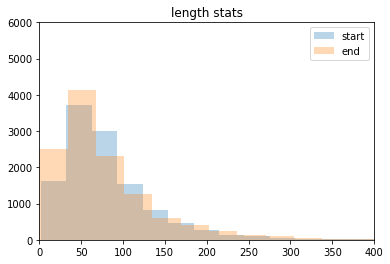

In [253]:
import matplotlib.pyplot as plt
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)
plt.axis([0,400,0,6000])
plt.hist(start_len,**kwargs,label = 'start')
plt.hist(end_len,**kwargs, label = 'end')
plt.title('length stats')
plt.legend()
plt.show()

In [212]:
data_fixed[8000]

{'pmid': 11480,
 'title': '人心不足蛇吞象',
 'content': ['《山海经·海内南经》：“巴蛇食象，三岁而出其骨。”屈原的《天文》：“一蛇吞象，厥大何如。”罗洪宪诗曰：“人心不足蛇吞象，世世到头螳捕蝉。”如此一说，贪婪是人的本性也就不足为奇了。',
  '横观沧海，纵观古今。汉武帝时期淮南王刘安起兵意图替代汉武帝刘彻登上大宝；唐末有大将军安禄山和史思明在唐朝的颓废上打了一针催化剂，史称“安史之乱”，其图谋可想而知；在满族人统治的清朝，“冲冠一怒为红颜”的吴三桂也想坐上万民之主的位子。试想，他们造反是因为地位不够高吗？还是说他们的权利欲太过旺盛？',
  '贪婪与也野心是人人都会有的，大小之分而已。',
  '大的人人都知晓，小的就不是那么显而易见了。时下正值盛夏，是西瓜的高产期。在下午我切了蛮大的一块给自己，虽然我明知道自己是不可能把它全部吃完的，但是，当姐姐说“为我分担”的时候，我不经仅一口拒绝，还快速离开。结果没有出人意料，我吃了大半胃就再也装不下了。',
  '这件事情是微不足道，但“这件事情里隐藏的事情”还会是这样吗？',
  '在太平盛世下，生活无虞锦衣玉食的人想通过造反这一条“捷径”登上皇位，不就是因为心中的疑心和贪婪在驱使着他们这样做吗？',
  '古人在就说过，人心不足蛇吞象，世世到头螳捕蝉。人人都明白这个道理，但为什么还是有人“明知不可为而为之”呢？'],
 'allwords': '开篇：《山海经·海内南经》：“巴蛇食象，三岁而出其骨。”屈原的《天文》：“一蛇吞象，厥大何如。”罗洪宪诗曰：“人心不足蛇吞象，世世到头螳捕蝉。”如此一说，贪婪是人的本性也就不足为奇了。论述：横观沧海，纵观古今。汉武帝时期淮南王刘安起兵意图替代汉武帝刘彻登上大宝；唐末有大将军安禄山和史思明在唐朝的颓废上打了一针催化剂，史称“安史之乱”，其图谋可想而知；在满族人统治的清朝，“冲冠一怒为红颜”的吴三桂也想坐上万民之主的位子。试想，他们造反是因为地位不够高吗？还是说他们的权利欲太过旺盛？贪婪与也野心是人人都会有的，大小之分而已。大的人人都知晓，小的就不是那么显而易见了。时下正值盛夏，是西瓜的高产期。在下午我切了蛮大的一块给自己，虽然我明知道自己是不可能把它全部吃完的，但是，当姐姐说“为我分担”的时候，我不经仅一口拒绝，还快速离开。结果没有出

In [224]:
len('开篇：《山海经·海内南经》：“巴蛇食象，三岁而出其骨。”屈原的《天文》：“一蛇吞象，厥大何如。”罗洪宪诗曰：“人心不足蛇吞象，世世到头螳捕蝉。”如此一说，贪婪是人的本性也就不足为奇了。结尾：古人在就说过，人心不足蛇吞象，世世到头螳捕蝉。人人都明白这个道理，但为什么还是有人“明知不可为而为之”呢？')

148

## jieba分词

In [198]:
import jieba

In [254]:
copy_data_fixed = copy.deepcopy(data_fixed)

In [264]:
# 全部内容的
jieba_data_fixed_allwords = []
for zuowen in data_fixed:
    cur_dict = {}
    cur_dict['pmid'] = zuowen['pmid']
    cur_dict['title'] = list(jieba.cut(zuowen['title']))
    cur_dict['abs'] = list(jieba.cut(zuowen['allwords']))
    cur_dict['words'] = cur_dict['title']+cur_dict['abs']
    jieba_data_fixed_allwords.append(cur_dict)

In [267]:
data_fixed[0]

{'pmid': 3361,
 'title': '关于考学和爱好',
 'content': ['好好学习然后上大学找工作真的是唯一的出路吗？我的回答是：不是，但这是唯一一条可以靠努力实现且没有一点不公平的出路。而爱好，真的不可以与考学成绩兼得吗？仍旧不是',
  '除了考学，我们还可以有很多出路，比如去创业，去打工等等，但这其中定有比考学还难的更多阻碍，更多挫折等着你去遇见。就好比你站在指教三角形中的一点，你眼前有两条道路可以达到终点，而你却非要选择那条长的路一样。不是说不考学就无法成功，这世上，有成千上万人不是考学而成功的，但考学是唯一公平的捷径。',
  '再说说爱好，每个人都有自己的爱好，弹琴画画写作体育等等，但在学习自己爱好的之前，文化课也是不能少的。比如你会弹吉他，而别人在请教你吉他的发声原理时，你哑口无声。爱好和文化课可兼得，但必须要分清其中的主次关系才行，学好文化课，然后再去经营自己的爱好，在自己的爱好中得到了乐趣，从而使心情愉悦对未来充满憧憬和希望，对文化课中的难题也心态端正。这样一来，爱好与考学之间的关系，不再是不可兼得，而是互赢互利了。',
  '而且，现在的成绩不好不代表什么，只要掌握好考学与爱好的关键点就不会错，乾坤未定，你我皆黑马。'],
 'allwords': '开篇：好好学习然后上大学找工作真的是唯一的出路吗？我的回答是：不是，但这是唯一一条可以靠努力实现且没有一点不公平的出路。而爱好，真的不可以与考学成绩兼得吗？仍旧不是。论述：除了考学，我们还可以有很多出路，比如去创业，去打工等等，但这其中定有比考学还难的更多阻碍，更多挫折等着你去遇见。就好比你站在指教三角形中的一点，你眼前有两条道路可以达到终点，而你却非要选择那条长的路一样。不是说不考学就无法成功，这世上，有成千上万人不是考学而成功的，但考学是唯一公平的捷径。再说说爱好，每个人都有自己的爱好，弹琴画画写作体育等等，但在学习自己爱好的之前，文化课也是不能少的。比如你会弹吉他，而别人在请教你吉他的发声原理时，你哑口无声。爱好和文化课可兼得，但必须要分清其中的主次关系才行，学好文化课，然后再去经营自己的爱好，在自己的爱好中得到了乐趣，从而使心情愉悦对未来充满憧憬和希望，对文化课中的难题也心态端正。这样一来，爱好与考学之间的关系，不再是不可兼得，而是互赢互利了。结尾：而且，现在的成绩

In [265]:
jieba_data_fixed_allwords[0]

{'pmid': 3361,
 'title': ['关于', '考学', '和', '爱好'],
 'abs': ['开篇',
  '：',
  '好好学习',
  '然后',
  '上',
  '大学',
  '找',
  '工作',
  '真的',
  '是',
  '唯一',
  '的',
  '出路',
  '吗',
  '？',
  '我',
  '的',
  '回答',
  '是',
  '：',
  '不是',
  '，',
  '但',
  '这',
  '是',
  '唯一',
  '一条',
  '可以',
  '靠',
  '努力实现',
  '且',
  '没有',
  '一点',
  '不',
  '公平',
  '的',
  '出路',
  '。',
  '而',
  '爱好',
  '，',
  '真的',
  '不',
  '可以',
  '与',
  '考学',
  '成绩',
  '兼得',
  '吗',
  '？',
  '仍旧',
  '不是',
  '。',
  '论述',
  '：',
  '除了',
  '考学',
  '，',
  '我们',
  '还',
  '可以',
  '有',
  '很多',
  '出路',
  '，',
  '比如',
  '去',
  '创业',
  '，',
  '去',
  '打工',
  '等等',
  '，',
  '但',
  '这',
  '其中',
  '定有',
  '比',
  '考学',
  '还',
  '难',
  '的',
  '更',
  '多',
  '阻碍',
  '，',
  '更',
  '多',
  '挫折',
  '等',
  '着',
  '你',
  '去',
  '遇见',
  '。',
  '就',
  '好比',
  '你',
  '站',
  '在',
  '指教',
  '三角形',
  '中',
  '的',
  '一点',
  '，',
  '你',
  '眼前',
  '有',
  '两条道路',
  '可以',
  '达到',
  '终点',
  '，',
  '而',
  '你',
  '却',
  '非要',
  '选择',
  '那条',
  '长',
  '的',
  '路',
  '一样',
  '。',
  '不是

In [266]:
# 只包含首尾部分
jieba_data_fixed_startend = []
for zuowen in data_fixed:
    cur_dict = {}
    cur_dict['pmid'] = zuowen['pmid']
    cur_dict['title'] = list(jieba.cut(zuowen['title']))
    cur_dict['abs'] = list(jieba.cut(zuowen['startend']))
    cur_dict['words'] = cur_dict['title']+cur_dict['abs']
    jieba_data_fixed_startend.append(cur_dict)

In [268]:
jieba_data_fixed_startend[0]

{'pmid': 3361,
 'title': ['关于', '考学', '和', '爱好'],
 'abs': ['开篇',
  '：',
  '好好学习',
  '然后',
  '上',
  '大学',
  '找',
  '工作',
  '真的',
  '是',
  '唯一',
  '的',
  '出路',
  '吗',
  '？',
  '我',
  '的',
  '回答',
  '是',
  '：',
  '不是',
  '，',
  '但',
  '这',
  '是',
  '唯一',
  '一条',
  '可以',
  '靠',
  '努力实现',
  '且',
  '没有',
  '一点',
  '不',
  '公平',
  '的',
  '出路',
  '。',
  '而',
  '爱好',
  '，',
  '真的',
  '不',
  '可以',
  '与',
  '考学',
  '成绩',
  '兼得',
  '吗',
  '？',
  '仍旧',
  '不是',
  '。',
  '结尾',
  '：',
  '而且',
  '，',
  '现在',
  '的',
  '成绩',
  '不好',
  '不',
  '代表',
  '什么',
  '，',
  '只要',
  '掌握',
  '好',
  '考学',
  '与',
  '爱好',
  '的',
  '关键点',
  '就',
  '不会错',
  '，',
  '乾坤',
  '未定',
  '，',
  '你',
  '我',
  '皆',
  '黑马',
  '。'],
 'words': ['关于',
  '考学',
  '和',
  '爱好',
  '开篇',
  '：',
  '好好学习',
  '然后',
  '上',
  '大学',
  '找',
  '工作',
  '真的',
  '是',
  '唯一',
  '的',
  '出路',
  '吗',
  '？',
  '我',
  '的',
  '回答',
  '是',
  '：',
  '不是',
  '，',
  '但',
  '这',
  '是',
  '唯一',
  '一条',
  '可以',
  '靠',
  '努力实现',
  '且',
  '没有',
  '一点',
  '不',
  '公平',


In [270]:
with open('jieba_data_fixed_allwords.txt', 'w') as f:
    for zuowen in jieba_data_fixed_allwords:
        f.write(str(zuowen))
        f.write('\n')

In [271]:
with open('jieba_data_fixed_startend.txt', 'w') as f:
    for zuowen in jieba_data_fixed_startend:
        f.write(str(zuowen))
        f.write('\n')